# STEM Careers

## Data Exploration

In [39]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np

In [139]:
# load the dataset
coupon = pd.read_csv("repeater_prediction.csv")
# breifly explore the data types
coupon.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47955 entries, 0 to 47954
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   repeater               47955 non-null  int64  
 1   chain                  47955 non-null  object 
 2   market                 47955 non-null  int64  
 3   offervalue             47955 non-null  float64
 4   avg_category_quantity  47955 non-null  float64
 5   avg_category_amount    47955 non-null  float64
 6   exact_item_bought      47955 non-null  int64  
dtypes: float64(3), int64(3), object(1)
memory usage: 2.6+ MB


In [140]:
# exact_item_bought is a categorical variable
coupon.exact_item_bought.value_counts()

1    24218
0    23737
Name: exact_item_bought, dtype: int64

In [136]:
# market is a categorical variable (region id = nominal): convert the data type to object
coupon.market.value_counts()

10    12662
21     3006
27     2589
37     2340
9      2288
15     2272
12     2239
20     2218
96     2005
8      1807
14     1636
1      1500
4      1443
16     1364
34     1176
33      995
35      786
2       606
39      586
7       581
18      564
11      526
22      431
28      426
17      420
24      405
26      307
43      197
45      190
6       151
23      144
93       59
47       21
5        15
Name: market, dtype: int64

In [137]:
# dependent variable "repeater" is a categorical variable
coupon.repeater.value_counts()

0    34777
1    13178
Name: repeater, dtype: int64

In [141]:
# market variable represents region id that should be converted to a dummy variable
# So, change the data type to object
coupon["market"] = coupon["market"].astype(object)
coupon["market"].dtype

dtype('O')

In [142]:
# change the data type to object to convert it to a dummy variable
coupon["exact_item_bought"] = coupon["exact_item_bought"].astype(object)
coupon["exact_item_bought"].dtype

dtype('O')

In [45]:
# check if there are data values unable to be converted to integer
for i in range(len(coupon["chain"])):
    try:
        coupon["chain"][i] = int(coupon["chain"][i])
    except:
        print(coupon["chain"][i])

unknown
unknown
unknown
unknown
unknown
unknown
unknown
unknown
unknown
unknown
unknown
unknown
unknown
unknown
unknown
unknown
unknown
unknown
unknown
unknown
unknown
unknown
unknown
unknown
unknown
unknown


* Delete the rows including "unkonwn" value

In [143]:
# detect the indices corresponding to the data "unknown"
chain_index = coupon[coupon["chain"] == "unknown"].index

In [144]:
# drop the rows 
coupon = coupon.drop(chain_index)

In [145]:
# convert the data type of the column "chain" to integer
coupon["chain"] = coupon["chain"].astype(int)
coupon["chain"].dtype

dtype('int64')

In [146]:
coupon.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47929 entries, 0 to 47954
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   repeater               47929 non-null  int64  
 1   chain                  47929 non-null  int64  
 2   market                 47929 non-null  object 
 3   offervalue             47929 non-null  float64
 4   avg_category_quantity  47929 non-null  float64
 5   avg_category_amount    47929 non-null  float64
 6   exact_item_bought      47929 non-null  object 
dtypes: float64(3), int64(2), object(2)
memory usage: 2.9+ MB


* extract the independent variables from the data frame

In [147]:
X_features = list(coupon.columns)
X_features.remove(X_features[0])
X_features

['chain',
 'market',
 'offervalue',
 'avg_category_quantity',
 'avg_category_amount',
 'exact_item_bought']

* encode the independent variables by transforming the categorical variables to dummy variables

In [148]:
encoded_coupon = pd.get_dummies(coupon[X_features], drop_first = True)
encoded_coupon.head()

,chain,offervalue,avg_category_quantity,avg_category_amount,market_2,market_4,market_5,market_6,market_7,market_8,...,market_34,market_35,market_37,market_39,market_43,market_45,market_47,market_93,market_96,exact_item_bought_1
0,15,0.75,0.000000,0.000000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,14,1.25,1.333333,4.653333,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
2,4,0.75,0.000000,0.000000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,15,0.75,0.000000,0.000000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,17,0.75,0.000000,0.000000,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


* Split the data frame into train & test sets

In [52]:
# import needed packages
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [53]:
# define the target variable and independent variables with a constant column 
y = coupon["repeater"]
X0 = sm.add_constant(encoded_coupon)

In [54]:
# split the dataset into a ratio 7:3
x_train, x_test, y_train, y_test = train_test_split(X0, y, train_size = 0.7, random_state = 123)

## Build a logistic regression model with the train sets

* fit a logistic model with the train datasets

In [55]:
model = sm.Logit(y_train, x_train)
coupon_logit = model.fit()

Optimization terminated successfully.
         Current function value: 0.573326
         Iterations 6


In [56]:
# show the summary
coupon_logit.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                            Results: Logit
======================================================================
Model:                Logit             Pseudo R-squared:  0.026      
Dependent Variable:   repeater          AIC:               38548.1846 
Date:                 2020-12-02 15:09  BIC:               38876.5955 
No. Observations:     33550             Log-Likelihood:    -19235.    
Df Model:             38                LL-Null:           -19748.    
Df Residuals:         33511             LLR p-value:       1.2768e-190
Converged:            1.0000            Scale:             1.0000     
No. Iterations:       6.0000                                          
----------------------------------------------------------------------
                       Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
----------------------------------------------------------------------
const                 -1.5087   0.0865 -17.4396 0.0000 -1.6783 -1.3392
chain                  0.0002   0.0002   1.1416 0.2536 -0.0001  0.0005
offervalue            -0.1457   0.0259  -5.6176 0.0000 -0.1965 -0.0948
avg_category_quantity  0.1097   0.0325   3.3776 0.0007  0.0460  0.1734
avg_category_amount    0.0949   0.0092  10.3603 0.0000  0.0769  0.1128
market_2              -0.3804   0.1662  -2.2880 0.0221 -0.7062 -0.0545
market_4               0.4266   0.1081   3.9458 0.0001  0.2147  0.6384
market_5              -0.6365   1.0594  -0.6008 0.5480 -2.7130  1.4399
market_6              -0.3140   0.3146  -0.9978 0.3184 -0.9307  0.3027
market_7               0.4453   0.1406   3.1676 0.0015  0.1698  0.7208
market_8               0.4615   0.1056   4.3713 0.0000  0.2546  0.6684
market_9               0.5837   0.1019   5.7281 0.0000  0.3840  0.7834
market_10              0.5286   0.0847   6.2371 0.0000  0.3625  0.6947
market_11             -0.0107   0.1578  -0.0679 0.9459 -0.3200  0.2986
market_12              0.3950   0.1039   3.8022 0.0001  0.1914  0.5986
market_14              1.2786   0.1033  12.3824 0.0000  1.0762  1.4810
market_15              0.0541   0.1041   0.5199 0.6031 -0.1499  0.2581
market_16              0.3889   0.1115   3.4883 0.0005  0.1704  0.6074
market_17              0.3548   0.1609   2.2047 0.0275  0.0394  0.6701
market_18              0.3086   0.1468   2.1027 0.0355  0.0209  0.5963
market_20              0.6231   0.0993   6.2726 0.0000  0.4284  0.8178
market_21              0.9182   0.0955   9.6130 0.0000  0.7310  1.1054
market_22              0.2540   0.1597   1.5904 0.1118 -0.0590  0.5670
market_23              0.5472   0.2516   2.1743 0.0297  0.0539  1.0404
market_24              0.4593   0.1597   2.8763 0.0040  0.1463  0.7723
market_26              0.2316   0.1900   1.2184 0.2231 -0.1409  0.6040
market_27              0.5799   0.0972   5.9654 0.0000  0.3894  0.7704
market_28              0.4211   0.1599   2.6343 0.0084  0.1078  0.7344
market_33              0.4595   0.1265   3.6328 0.0003  0.2116  0.7074
market_34              0.5949   0.1136   5.2362 0.0000  0.3722  0.8176
market_35              0.5396   0.1317   4.0961 0.0000  0.2814  0.7978
market_37              0.5315   0.1094   4.8585 0.0000  0.3171  0.7460
market_39              0.2401   0.1473   1.6295 0.1032 -0.0487  0.5289
market_43              0.3687   0.2217   1.6631 0.0963 -0.0658  0.8031
market_45              0.4307   0.2239   1.9234 0.0544 -0.0082  0.8696
market_47             -0.9704   1.0510  -0.9233 0.3559 -3.0303  1.0896
market_93             -0.3909   0.4602  -0.8493 0.3957 -1.2929  0.5111
market_96              0.1454   0.1357   1.0714 0.2840 -0.1206  0.4115
exact_item_bought_1   -0.2042   0.0463  -4.4079 0.0000 -0.2950 -0.1134
======================================================================

"""

#### (1) Some independent variables with p-values bigger than 0.05 are observed. 
#### (2) BIC = 38876.5955

* Select the independent variables with the p-values smaller than and equal to 0.05

In [67]:
# Create a data frame with the p-values of the independent variables
coupon_pvalues = pd.DataFrame(coupon_logit.pvalues)
# Reset the index to make the array of the variable names a column 
coupon_pvalues = coupon_pvalues.reset_index()

In [68]:
# Set the column names
coupon_pvalues.columns = ["vars", "pvalues"]
coupon_pvalues.head(3)

,vars,pvalues
0,const,4.131728e-68
1,chain,2.536122e-01
2,offervalue,1.936187e-08


In [69]:
# Select the variables whose p-value <= 0.05
sig_var = list(coupon_pvalues.iloc[i, 0] for i in range(len(coupon_pvalues)) if coupon_pvalues.iloc[i, 1] <= 0.05)
sig_var

['const',
 'offervalue',
 'avg_category_quantity',
 'avg_category_amount',
 'market_2',
 'market_4',
 'market_7',
 'market_8',
 'market_9',
 'market_10',
 'market_12',
 'market_14',
 'market_16',
 'market_17',
 'market_18',
 'market_20',
 'market_21',
 'market_23',
 'market_24',
 'market_27',
 'market_28',
 'market_33',
 'market_34',
 'market_35',
 'market_37',
 'exact_item_bought_1']

In [70]:
# refit the logistic model
coupon_fit2 = sm.Logit(y_train, x_train[sig_var]).fit()
coupon_fit2.summary2()

Optimization terminated successfully.
         Current function value: 0.573630
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                            Results: Logit
======================================================================
Model:                Logit             Pseudo R-squared:  0.025      
Dependent Variable:   repeater          AIC:               38542.5878 
Date:                 2020-12-02 15:47  BIC:               38761.5284 
No. Observations:     33550             Log-Likelihood:    -19245.    
Df Model:             25                LL-Null:           -19748.    
Df Residuals:         33524             LLR p-value:       3.0481e-196
Converged:            1.0000            Scale:             1.0000     
No. Iterations:       6.0000                                          
----------------------------------------------------------------------
                       Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
----------------------------------------------------------------------
const                 -1.3764   0.0491 -28.0196 0.0000 -1.4726 -1.2801
offervalue            -0.1434   0.0257  -5.5710 0.0000 -0.1938 -0.0929
avg_category_quantity  0.1050   0.0322   3.2604 0.0011  0.0419  0.1681
avg_category_amount    0.0946   0.0091  10.3489 0.0000  0.0767  0.1125
market_2              -0.5006   0.1486  -3.3682 0.0008 -0.7918 -0.2093
market_4               0.2945   0.0796   3.7007 0.0002  0.1385  0.4504
market_7               0.3112   0.1201   2.5911 0.0096  0.0758  0.5465
market_8               0.3542   0.0720   4.9225 0.0000  0.2132  0.4953
market_9               0.4808   0.0649   7.4049 0.0000  0.3536  0.6081
market_10              0.4030   0.0413   9.7649 0.0000  0.3221  0.4839
market_12              0.2943   0.0672   4.3826 0.0000  0.1627  0.4259
market_14              1.1671   0.0697  16.7509 0.0000  1.0305  1.3036
market_16              0.2672   0.0833   3.2089 0.0013  0.1040  0.4303
market_17              0.2238   0.1431   1.5637 0.1179 -0.0567  0.5042
market_18              0.1993   0.1252   1.5919 0.1114 -0.0461  0.4446
market_20              0.5015   0.0658   7.6234 0.0000  0.3726  0.6305
market_21              0.8070   0.0584  13.8123 0.0000  0.6925  0.9215
market_23              0.4179   0.2407   1.7364 0.0825 -0.0538  0.8896
market_24              0.3642   0.1375   2.6479 0.0081  0.0946  0.6338
market_27              0.4618   0.0619   7.4591 0.0000  0.3405  0.5831
market_28              0.3143   0.1400   2.2450 0.0248  0.0399  0.5887
market_33              0.3782   0.0919   4.1142 0.0000  0.1980  0.5583
market_34              0.4831   0.0848   5.7006 0.0000  0.3170  0.6493
market_35              0.4558   0.1002   4.5489 0.0000  0.2594  0.6522
market_37              0.4519   0.0645   7.0036 0.0000  0.3255  0.5784
exact_item_bought_1   -0.1927   0.0455  -4.2322 0.0000 -0.2820 -0.1035
======================================================================

"""

* There are 3 variables of which p-values have increased above 0.05 after refitting the model
-> drop the variables

In [74]:
coupon_pvalues2 = pd.DataFrame(coupon_fit2.pvalues)
coupon_pvalues2 = coupon_pvalues2.reset_index()
sig_var2 = list(coupon_pvalues2.iloc[i, 0] for i in range(len(coupon_pvalues2)) if coupon_pvalues2.iloc[i, 1] <= 0.05)
sig_var2

['const',
 'offervalue',
 'avg_category_quantity',
 'avg_category_amount',
 'market_2',
 'market_4',
 'market_7',
 'market_8',
 'market_9',
 'market_10',
 'market_12',
 'market_14',
 'market_16',
 'market_20',
 'market_21',
 'market_24',
 'market_27',
 'market_28',
 'market_33',
 'market_34',
 'market_35',
 'market_37',
 'exact_item_bought_1']

In [75]:
# refit the logistic model
coupon_fit3 = sm.Logit(y_train, x_train[sig_var2]).fit()
coupon_fit3.summary2()

Optimization terminated successfully.
         Current function value: 0.573736
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                            Results: Logit
======================================================================
Model:                Logit             Pseudo R-squared:  0.025      
Dependent Variable:   repeater          AIC:               38543.6702 
Date:                 2020-12-02 16:00  BIC:               38737.3484 
No. Observations:     33550             Log-Likelihood:    -19249.    
Df Model:             22                LL-Null:           -19748.    
Df Residuals:         33527             LLR p-value:       3.2666e-197
Converged:            1.0000            Scale:             1.0000     
No. Iterations:       6.0000                                          
----------------------------------------------------------------------
                       Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
----------------------------------------------------------------------
const                 -1.3469   0.0476 -28.3117 0.0000 -1.4402 -1.2537
offervalue            -0.1435   0.0257  -5.5770 0.0000 -0.1939 -0.0930
avg_category_quantity  0.1061   0.0322   3.2958 0.0010  0.0430  0.1692
avg_category_amount    0.0943   0.0091  10.3157 0.0000  0.0764  0.1122
market_2              -0.5301   0.1481  -3.5790 0.0003 -0.8204 -0.2398
market_4               0.2649   0.0786   3.3685 0.0008  0.1107  0.4190
market_7               0.2815   0.1195   2.3562 0.0185  0.0473  0.5156
market_8               0.3245   0.0709   4.5765 0.0000  0.1855  0.4635
market_9               0.4509   0.0637   7.0732 0.0000  0.3259  0.5758
market_10              0.3733   0.0394   9.4728 0.0000  0.2961  0.4506
market_12              0.2647   0.0660   4.0087 0.0001  0.1353  0.3941
market_14              1.1370   0.0686  16.5852 0.0000  1.0026  1.2714
market_16              0.2374   0.0823   2.8833 0.0039  0.0760  0.3988
market_20              0.4720   0.0646   7.3003 0.0000  0.3452  0.5987
market_21              0.7773   0.0571  13.6062 0.0000  0.6653  0.8893
market_24              0.3345   0.1370   2.4419 0.0146  0.0660  0.6031
market_27              0.4322   0.0607   7.1211 0.0000  0.3133  0.5512
market_28              0.2846   0.1395   2.0407 0.0413  0.0113  0.5579
market_33              0.3484   0.0911   3.8249 0.0001  0.1699  0.5270
market_34              0.4534   0.0839   5.4069 0.0000  0.2891  0.6178
market_35              0.4261   0.0994   4.2845 0.0000  0.2312  0.6210
market_37              0.4224   0.0634   6.6655 0.0000  0.2982  0.5466
exact_item_bought_1   -0.1921   0.0455  -4.2199 0.0000 -0.2814 -0.1029
======================================================================

"""

### -> BIC: 38,877 -> 38,737 (decreased)
### -> Now that the model contains only the variables with p-values <= 0.05, test the model's accuracy with the test sets

In [177]:
# Create a data frame with the actual y_test values and the predicted probabilities by plugging the x_test values to the model
y_pred = pd.DataFrame({"actual":y_test, "pred_prob":coupon_fit3.predict(x_test[sig_var2])})
y_pred.sample(10, random_state = 13)

,actual,pred_prob
15059,0,0.220882
31510,1,0.272384
18900,0,0.443755
18594,0,0.234979
14914,0,0.281880
30976,1,0.242371
32966,1,0.275705
44063,1,0.300733
10449,0,0.220882
10987,0,0.253279


In [183]:
# add a column to the data frame with the predicted y values by changing the probabilities to 0 or 1 based on the criterion 0.3
y_pred['predicted'] = y_pred["pred_prob"].map(lambda x: 1 if x > 0.3 else 0)
y_pred.sample(10, random_state = 13)

,actual,pred_prob,predicted
15059,0,0.220882,0
31510,1,0.272384,0
18900,0,0.443755,1
18594,0,0.234979,0
14914,0,0.281880,0
30976,1,0.242371,0
32966,1,0.275705,0
44063,1,0.300733,1
10449,0,0.220882,0
10987,0,0.253279,0


## Measuring the model's accuracies

In [184]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn import metrics

### 1) Confusion Matrix

In [185]:
def draw_cm(actual, predicted):
    cm = metrics.confusion_matrix( actual, predicted, [1,0] )
    sns.heatmap(cm, annot=True, fmt='.2f',
    xticklabels = ["failure", "success"] ,
    yticklabels = ["failure", "success"] )
    plt.ylabel('Actual')
    plt.xlabel('Predicted_y')
    plt.show()

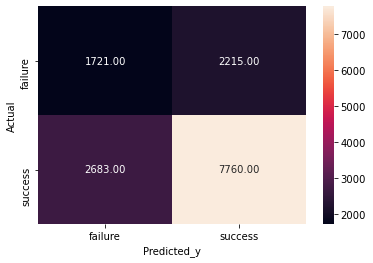

In [186]:
draw_cm(y_pred["actual"], y_pred["predicted"])

* true negatives = 1721/ true positives = 7760
* false negatives = 2215/ false positives = 2683

### 2) Classification Report

In [118]:
print(metrics.classification_report( y_pred.actual,y_pred.predicted))

              precision    recall  f1-score   support

           0       0.78      0.74      0.76     10443
           1       0.39      0.44      0.41      3936

    accuracy                           0.66     14379
   macro avg       0.58      0.59      0.59     14379
weighted avg       0.67      0.66      0.67     14379



### !! Try to change the criterion percentage from 0.3 to 0.5 and test the accuracy 

In [120]:
y_pred['predicted'] = y_pred["pred_prob"].map(lambda x: 1 if x > 0.5 else 0)
print(metrics.classification_report( y_pred.actual,y_pred.predicted))

              precision    recall  f1-score   support

           0       0.73      0.99      0.84     10443
           1       0.51      0.02      0.03      3936

    accuracy                           0.73     14379
   macro avg       0.62      0.51      0.44     14379
weighted avg       0.67      0.73      0.62     14379



### -> inspite of the higher accuracy of the model with the criterion probability 0.5, the model barely predicts the target variable "1". And the lower macro averages in the recall and f1-score of the results with a 0.5 represent lower accuracies of the prediction.
### -> So, let's take the prediction results with a 0.3

In [125]:
y_pred['predicted'] = y_pred["pred_prob"].map(lambda x: 1 if x > 0.3 else 0)

## Model without the variable "Market"
#### -> Considering the possibility of the large number of the variables dropping the accuracies of the entire model, I'm trying to build a new model removing the Market variable

In [149]:
# drop the market variable
coupon2 = coupon.drop(["market"], axis = 1)
coupon2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47929 entries, 0 to 47954
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   repeater               47929 non-null  int64  
 1   chain                  47929 non-null  int64  
 2   offervalue             47929 non-null  float64
 3   avg_category_quantity  47929 non-null  float64
 4   avg_category_amount    47929 non-null  float64
 5   exact_item_bought      47929 non-null  object 
dtypes: float64(3), int64(2), object(1)
memory usage: 2.6+ MB


In [151]:
# get the independent variables
X_features2 = list(coupon2.columns)
X_features2.remove("repeater")
X_features2

['chain',
 'offervalue',
 'avg_category_quantity',
 'avg_category_amount',
 'exact_item_bought']

In [154]:
# encode the exact_item_bought
encoded_coupon2 = pd.get_dummies(coupon2[X_features2], drop_first=True)
encoded_coupon2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47929 entries, 0 to 47954
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   chain                  47929 non-null  int64  
 1   offervalue             47929 non-null  float64
 2   avg_category_quantity  47929 non-null  float64
 3   avg_category_amount    47929 non-null  float64
 4   exact_item_bought_1    47929 non-null  uint8  
dtypes: float64(3), int64(1), uint8(1)
memory usage: 1.9 MB


In [155]:
# split the dataset into train and test sets 
y2 = coupon2["repeater"]
x2 = sm.add_constant(encoded_coupon2)
x_train2, x_test2, y_train2, y_test2 = train_test_split(x2, y2, train_size = 0.7, random_state = 123)

In [157]:
# fit the logistic regression model
coupon2_fit = sm.Logit(y_train2, x_train2).fit()
coupon2_fit.summary2()

Optimization terminated successfully.
         Current function value: 0.580351
         Iterations 5


<class 'statsmodels.iolib.summary2.Summary'>
"""
                            Results: Logit
======================================================================
Model:                Logit             Pseudo R-squared:  0.014      
Dependent Variable:   repeater          AIC:               38953.5497 
Date:                 2020-12-02 20:05  BIC:               39004.0744 
No. Observations:     33550             Log-Likelihood:    -19471.    
Df Model:             5                 LL-Null:           -19748.    
Df Residuals:         33544             LLR p-value:       1.0253e-117
Converged:            1.0000            Scale:             1.0000     
No. Iterations:       5.0000                                          
----------------------------------------------------------------------
                       Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
----------------------------------------------------------------------
const                 -0.9741   0.0388 -25.1058 0.0000 -1.0501 -0.8980
chain                  0.0000   0.0001   0.4258 0.6703 -0.0002  0.0002
offervalue            -0.1722   0.0251  -6.8682 0.0000 -0.2213 -0.1230
avg_category_quantity  0.1858   0.0318   5.8502 0.0000  0.1236  0.2481
avg_category_amount    0.0859   0.0090   9.5770 0.0000  0.0684  0.1035
exact_item_bought_1   -0.2372   0.0430  -5.5136 0.0000 -0.3215 -0.1529
======================================================================

"""

* drop the column "chain" due to its p-value bigger than 0.05

In [160]:
# remove the chain from the both train and test sets
x_train2 = x_train2.drop(["chain"], axis = 1)
x_test2 = x_test2.drop(["chain"], axis = 1)
x_train2.head(3)

,const,offervalue,avg_category_quantity,avg_category_amount,exact_item_bought_1
2957,1.0,2.00,1.25,5.7125,1
25314,1.0,0.75,1.00,2.2400,1
40664,1.0,1.00,1.00,3.2920,1


In [161]:
# refit the logistic model 
coupon2_fit2 = sm.Logit(y_train2, x_train2).fit()
coupon2_fit2.summary2()

Optimization terminated successfully.
         Current function value: 0.580354
         Iterations 5


<class 'statsmodels.iolib.summary2.Summary'>
"""
                            Results: Logit
======================================================================
Model:                Logit             Pseudo R-squared:  0.014      
Dependent Variable:   repeater          AIC:               38951.7308 
Date:                 2020-12-02 20:12  BIC:               38993.8347 
No. Observations:     33550             Log-Likelihood:    -19471.    
Df Model:             4                 LL-Null:           -19748.    
Df Residuals:         33545             LLR p-value:       8.9372e-119
Converged:            1.0000            Scale:             1.0000     
No. Iterations:       5.0000                                          
----------------------------------------------------------------------
                       Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
----------------------------------------------------------------------
const                 -0.9695   0.0373 -25.9953 0.0000 -1.0426 -0.8964
offervalue            -0.1718   0.0251  -6.8574 0.0000 -0.2209 -0.1227
avg_category_quantity  0.1851   0.0317   5.8370 0.0000  0.1230  0.2473
avg_category_amount    0.0858   0.0090   9.5684 0.0000  0.0682  0.1034
exact_item_bought_1   -0.2352   0.0428  -5.5008 0.0000 -0.3190 -0.1514
======================================================================

"""

### -> all the variables have p-values < 0.05
### -> BIC has decreased 

### Create a data frame with the y_test values and the predicted y values

In [163]:
# actual y_test values & predicted probabilities for y
y_pred2 = pd.DataFrame({"actual":y_test2, "pred_prob":coupon2_fit2.predict(x_test2)})
y_pred2.sample(10, random_state = 13)

,actual,pred_prob
15059,0,0.211972
31510,1,0.250050
18900,0,0.269507
18594,0,0.211972
14914,0,0.275245
30976,1,0.226674
32966,1,0.290711
44063,1,0.326119
10449,0,0.211972
10987,0,0.250050


* Add a predicted column by changing the probabilities to 0 or to 1

In [188]:
# set the criterion probability as 0.3
y_pred2['predicted'] = y_pred2["pred_prob"].map(lambda x: 1 if x > 0.3 else 0)
y_pred2.sample(10, random_state = 13)

,actual,pred_prob,predicted
15059,0,0.211972,0
31510,1,0.250050,0
18900,0,0.269507,0
18594,0,0.211972,0
14914,0,0.275245,0
30976,1,0.226674,0
32966,1,0.290711,0
44063,1,0.326119,1
10449,0,0.211972,0
10987,0,0.250050,0


### Measuring the model's accuracies

#### 1) Confusion Matrix

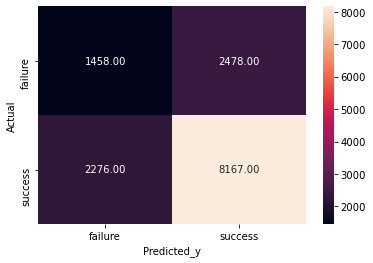

In [189]:
draw_cm(y_pred2["actual"], y_pred2["predicted"])

#### 2) Classification Report

In [190]:
print(metrics.classification_report(y_pred2.actual,y_pred2.predicted))

              precision    recall  f1-score   support

           0       0.77      0.78      0.77     10443
           1       0.39      0.37      0.38      3936

    accuracy                           0.67     14379
   macro avg       0.58      0.58      0.58     14379
weighted avg       0.66      0.67      0.67     14379



#### Compare the results to the with-market model's results

In [192]:
print(metrics.classification_report( y_pred.actual,y_pred.predicted))

              precision    recall  f1-score   support

           0       0.78      0.74      0.76     10443
           1       0.39      0.44      0.41      3936

    accuracy                           0.66     14379
   macro avg       0.58      0.59      0.59     14379
weighted avg       0.67      0.66      0.67     14379



### -> There is no considerable differences between the two results 
### -> So, I'll take the "without-market model" because theh smaller number of the independent variables can make it easier to be treated and analyzed  